<a href="https://colab.research.google.com/github/LeonardoCechellaVelho/machine-learning/blob/master/algoritmos_geneticos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LISTA DE EXERCÍCIOS 2**

Aluno: Leonardo Cechella Velho

# **Exercício 1**

Com base no algoritmo desenvolvido em sala de aula, realize uma alteração onde o usuário deverá informar uma quantidade de itens que ele queira cadastrar, depois ele deverá cadastrar esses itens (peso e valor) e também informar a capacidade máxima da mochila. (pts: 0.5).

In [ ]:
import numpy as np 
import pandas as pd
import random as rd 
from random import randint 
import matplotlib.pyplot as plt
from IPython.display import clear_output 

In [ ]:
n = int(input("Defina o número de itens da loja: "))
clear_output()
numero_itens = []
pesos = []
valores = []

for i in range(n):
  numero_itens.append(i+1)
  peso = int(input("Defina o peso do item " + str(i+1) + ": "))
  pesos.append(peso)
  valor = int(input("Defina o valor do item " + str(i+1) + ": "))
  valores.append(valor)

clear_output()

numero_itens = np.array(numero_itens)
pesos = np.array(pesos)
valores = np.array(valores)
max_peso_mochila = int(input("Defina o peso máximo que a mochila pode carregar: "))

print(numero_itens)
print(pesos)
print(valores)

Defina o peso máximo que a mochila pode carregar: 35
[1 2 3 4]
[10  9 13  4]
[245 679 700 140]


In [ ]:
print('Item.    Peso(Kg)     Valor ($)')
for i in range(numero_itens.shape[0]):
    print('{0}        {1}        {2}\n'.format(numero_itens[i], pesos[i], valores[i]))

Item.    Peso(Kg)     Valor ($)
1        10        245

2        9        679

3        13        700

4        4        140



In [ ]:
solucao_por_populacao = 8
tamanho_populacao = (solucao_por_populacao, numero_itens.shape[0])
print('Tamanho da População = {}'.format(tamanho_populacao))
print('Número de individuos (solução) = {}'.format(tamanho_populacao[0]))
print('Número itens (genes) = {}'.format(tamanho_populacao[1]))

Tamanho da População = (8, 4)
Número de individuos (solução) = 8
Número itens (genes) = 4


In [ ]:
populacao_inicial = np.random.randint(2, size = tamanho_populacao)
populacao_inicial = populacao_inicial.astype(int)
n_geracoes = 300 
print('População Inicial: \n{}'.format(populacao_inicial))

População Inicial: 
[[0 1 1 1]
 [0 0 1 1]
 [0 0 0 1]
 [0 0 0 1]
 [1 1 0 1]
 [1 0 1 0]
 [1 1 1 1]
 [0 0 1 1]]


In [ ]:
def cal_fitness(peso, valor, populacao, max_peso_mochila):
    fitness = np.empty(populacao.shape[0])
    for i in range(populacao.shape[0]):
        S1 = np.sum(populacao[i] * valor)
        S2 = np.sum(populacao[i] * peso) 
        if S2 <= max_peso_mochila:
           fitness[i] = S1
        else : 
           fitness[i] = 0
    return fitness.astype(int)  

In [ ]:
def selecao_roleta(fitness, numero_pais, populacao):
  max_fitness = sum(fitness)
  probabilidades = fitness/max_fitness 
  selecionados = populacao[np.random.choice(len(populacao),
                                            size=numero_pais,
                                            p=probabilidades)]
  return selecionados

In [ ]:
def crossover(pais, numero_filhos):
    filhos = np.empty((numero_filhos, pais.shape[1]))
    ponto_crossover = int(pais.shape[1]/2)
    for k in range(numero_filhos):
      pai_1_idx = k%pais.shape[0]
      pai_2_idx = (k+1)%pais.shape[0]
      filhos[k, 0:ponto_crossover] = pais[pai_1_idx, 0:ponto_crossover]
      filhos[k, ponto_crossover:] = pais[pai_2_idx, ponto_crossover:]
    return filhos

In [ ]:
def mutacao(filhos):
    mutacoes = np.empty((filhos.shape))
    for i in range(mutacoes.shape[0]):
        posicao_gene = randint(0,filhos.shape[1]-1)
        if mutacoes[i,posicao_gene] == 0 :
            mutacoes[i,posicao_gene] = 1
        else :
            mutacoes[i,posicao_gene] = 0
    return mutacoes

In [ ]:
def rodar_AG(pesos, valores, populacao, tamanho_populacao, n_geracoes, max_peso_mochila):
    parametros, historico_fitness = [], []
    numero_pais = int(tamanho_populacao[0]/2)
    numero_filhos = tamanho_populacao[0] - numero_pais
    fitness = []
    print('Número de pais {} e Número de filhos {}'.format(numero_pais,numero_filhos))
    for i in range(n_geracoes): 
        fitness = cal_fitness(pesos, valores, populacao, max_peso_mochila)
        historico_fitness.append(fitness)
        pais = selecao_roleta(fitness, numero_pais, populacao)
        filhos = crossover(pais, numero_filhos)
        filhos_mutados = mutacao(filhos)
        populacao[0:pais.shape[0], :] = pais 
        populacao[pais.shape[0]:, :] = filhos_mutados
    print('Última Geração: \n{}\n'.format(populacao))
    fitness_ultima_geracao = cal_fitness(pesos, valores, populacao, max_peso_mochila)
    print('Fitness Última Geração: \n{}\n'.format(fitness_ultima_geracao))
    max_fitness = np.where(fitness_ultima_geracao == np.max(fitness_ultima_geracao))
    parametros.append(populacao[max_fitness[0][0],:])
    return parametros, historico_fitness

In [ ]:
parametros, historico_fitness = rodar_AG(pesos,
                                         valores,
                                         populacao_inicial,
                                         tamanho_populacao,
                                         n_geracoes,
                                         max_peso_mochila)
print('Os parametros otimizados para as entradas fornecidas são: \n{}'.format(parametros))

Número de pais 4 e Número de filhos 4
Última Geração: 
[[1 1 1 0]
 [0 0 1 1]
 [0 1 1 1]
 [0 1 1 1]
 [0 1 1 0]
 [1 0 0 1]
 [0 0 1 0]
 [1 1 0 1]]

Fitness Última Geração: 
[1624  840 1519 1519 1379  385  700 1064]

Os parametros otimizados para as entradas fornecidas são: 
[array([1, 1, 1, 0])]


In [ ]:
itens_selecionados = numero_itens * parametros 
print('\n Itens selecionados que maximizarão a mochila sem quebrá-la:')
for i in range(itens_selecionados.shape[1]):
  if itens_selecionados[0][i] != 0:
      print('{}\n'.format(itens_selecionados[0][i]))


 Itens selecionados que maximizarão a mochila sem quebrá-la:
1

2

3



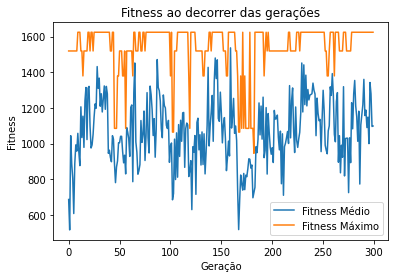

(300, 8)


In [ ]:
fitness_medio = [np.mean(fitness) for fitness in historico_fitness]
fitness_max = [np.max(fitness) for fitness in historico_fitness]
plt.plot(list(range(n_geracoes)), fitness_medio, label = 'Fitness Médio')
plt.plot(list(range(n_geracoes)), fitness_max, label = 'Fitness Máximo')
plt.legend()
plt.title('Fitness ao decorrer das gerações')
plt.xlabel('Geração')
plt.ylabel('Fitness')
plt.show()
print(np.asarray(historico_fitness).shape)

# **Exercício 2**

Com base no algoritmo desenvolvido na atividade anterior, realize uma alteração no crossover do código, você deverá implementar um crossover de múltiplos pontos (2 pontos, fica a seu critério definir as posições dos pontos) e apresente um comparativo (gráficos de geração x fitness) do código original (crossover de ponto único) e sua solução de crossover de múltiplos pontos. (pts: 1)
Obs: O Comparativo deve ser realizado com os mesmos itens, capacidade da mochila, tamanho da população, inicialização... 


In [ ]:
import numpy as np 
import pandas as pd
import random as rd 
from random import randint 
import matplotlib.pyplot as plt
from IPython.display import clear_output 

In [ ]:
n = int(input("Defina o número de itens da loja: "))
clear_output()
numero_itens = []
pesos = []
valores = []

for i in range(n):
  numero_itens.append(i+1)
  peso = int(input("Defina o peso do item " + str(i+1) + ": "))
  pesos.append(peso)
  valor = int(input("Defina o valor do item " + str(i+1) + ": "))
  valores.append(valor)

clear_output()

numero_itens = np.array(numero_itens)
pesos = np.array(pesos)
valores = np.array(valores)
max_peso_mochila = int(input("Defina o peso máximo que a mochila pode carregar: "))

print(numero_itens)
print(pesos)
print(valores)

Defina o peso máximo que a mochila pode carregar: 35
[1 2 3 4]
[10  9 13  4]
[245 679 700 140]


In [ ]:
print('Item.    Peso(Kg)     Valor ($)')
for i in range(numero_itens.shape[0]):
    print('{0}        {1}        {2}\n'.format(numero_itens[i], pesos[i], valores[i]))

Item.    Peso(Kg)     Valor ($)
1        10        245

2        9        679

3        13        700

4        4        140



In [ ]:
solucao_por_populacao = 8
tamanho_populacao = (solucao_por_populacao, numero_itens.shape[0])
print('Tamanho da População = {}'.format(tamanho_populacao))
print('Número de individuos (solução) = {}'.format(tamanho_populacao[0]))
print('Número itens (genes) = {}'.format(tamanho_populacao[1]))

Tamanho da População = (8, 4)
Número de individuos (solução) = 8
Número itens (genes) = 4


In [ ]:
populacao_inicial = np.random.randint(2, size = tamanho_populacao)
populacao_inicial = populacao_inicial.astype(int)
n_geracoes = 300 
print('População Inicial: \n{}'.format(populacao_inicial))

População Inicial: 
[[0 0 1 1]
 [0 0 0 0]
 [0 1 1 0]
 [1 0 0 1]
 [0 1 0 0]
 [0 0 0 1]
 [0 1 1 0]
 [0 1 1 0]]


In [ ]:
def cal_fitness(peso, valor, populacao, max_peso_mochila):
    fitness = np.empty(populacao.shape[0])
    for i in range(populacao.shape[0]):
        S1 = np.sum(populacao[i] * valor)
        S2 = np.sum(populacao[i] * peso) 
        if S2 <= max_peso_mochila:
           fitness[i] = S1
        else : 
           fitness[i] = 0
    return fitness.astype(int)  

In [ ]:
def selecao_roleta(fitness, numero_pais, populacao):
  max_fitness = sum(fitness)
  probabilidades = fitness/max_fitness 
  selecionados = populacao[np.random.choice(len(populacao),
                                            size=numero_pais,
                                            p=probabilidades)]
  return selecionados

In [ ]:
def crossover(pais, numero_filhos):
    filhos =np.empty((numero_filhos, pais.shape[1]))
    ponto_crossover = int(pais.shape[1]/2)
    for k in range(numero_filhos):
      pai_1_idx = k%pais.shape[0]
      pai_2_idx = (k+1)%pais.shape[0]
      filhos[k, 0:ponto_crossover] = pais[pai_1_idx, 0:ponto_crossover]
      filhos[k, ponto_crossover:] = pais[pai_2_idx, ponto_crossover:]
    return filhos

In [ ]:
def multi_point_crossover(pais, numero_filhos):
  for i in range(2):
    filhos = crossover(pais, numero_filhos)
  return filhos;

In [ ]:
def mutacao(filhos):
    mutacoes = np.empty((filhos.shape))
    for i in range(mutacoes.shape[0]):
        posicao_gene = randint(0,filhos.shape[1]-1)
        if mutacoes[i,posicao_gene] == 0 :
            mutacoes[i,posicao_gene] = 1
        else :
            mutacoes[i,posicao_gene] = 0
    return mutacoes

In [ ]:
def rodar_AG(pesos, valores, populacao, tamanho_populacao, n_geracoes, max_peso_mochila):
    parametros, historico_fitness = [], []
    numero_pais = int(tamanho_populacao[0]/2)
    numero_filhos = tamanho_populacao[0] - numero_pais
    fitness = []
    print('Número de pais {} e Número de filhos {}'.format(numero_pais,numero_filhos))
    for i in range(n_geracoes): 
        fitness = cal_fitness(pesos, valores, populacao, max_peso_mochila)
        historico_fitness.append(fitness)
        pais = selecao_roleta(fitness, numero_pais, populacao)
        filhos = multi_point_crossover(pais, numero_filhos)
        filhos_mutados = mutacao(filhos)
        populacao[0:pais.shape[0], :] = pais 
        populacao[pais.shape[0]:, :] = filhos_mutados
    print('Última Geração: \n{}\n'.format(populacao))
    fitness_ultima_geracao = cal_fitness(pesos, valores, populacao, max_peso_mochila)
    print('Fitness Última Geração: \n{}\n'.format(fitness_ultima_geracao))
    max_fitness = np.where(fitness_ultima_geracao == np.max(fitness_ultima_geracao))
    parametros.append(populacao[max_fitness[0][0],:])
    return parametros, historico_fitness

In [ ]:
parametros, historico_fitness = rodar_AG(pesos,
                                         valores,
                                         populacao_inicial,
                                         tamanho_populacao,
                                         n_geracoes,
                                         max_peso_mochila)
print('Os parametros otimizados para as entradas fornecidas são: \n{}'.format(parametros))

Número de pais 4 e Número de filhos 4
Última Geração: 
[[1 1 1 0]
 [1 0 1 0]
 [1 1 1 0]
 [1 1 1 0]
 [1 1 0 1]
 [1 1 1 1]
 [1 1 1 1]
 [1 1 0 0]]

Fitness Última Geração: 
[1624  945 1624 1624 1064    0    0  924]

Os parametros otimizados para as entradas fornecidas são: 
[array([1, 1, 1, 0])]


In [ ]:
itens_selecionados = numero_itens * parametros 
print('\n Itens selecionados que maximizarão a mochila sem quebrá-la:')
for i in range(itens_selecionados.shape[1]):
  if itens_selecionados[0][i] != 0:
      print('{}\n'.format(itens_selecionados[0][i]))


 Itens selecionados que maximizarão a mochila sem quebrá-la:
1

2

3



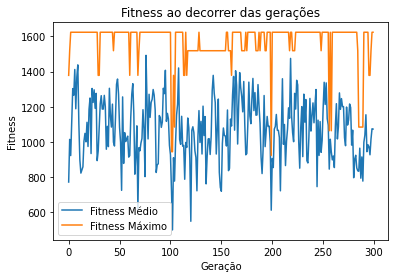

(300, 8)


In [ ]:
fitness_medio = [np.mean(fitness) for fitness in historico_fitness]
fitness_max = [np.max(fitness) for fitness in historico_fitness]
plt.plot(list(range(n_geracoes)), fitness_medio, label = 'Fitness Médio')
plt.plot(list(range(n_geracoes)), fitness_max, label = 'Fitness Máximo')
plt.legend()
plt.title('Fitness ao decorrer das gerações')
plt.xlabel('Geração')
plt.ylabel('Fitness')
plt.show()
print(np.asarray(historico_fitness).shape)

# **Exercício 3**

Dado o dataset (heart.csv) onde possui informações de pessoas que tiveram ataques cardíacos. Utilize uma rede neural artificial para criar um modelo inteligente que consiga realizar a predição. (pts:1.5)  
Você está livre para escolher melhor estrutura para rede neural (número de camadas, número de neurônios, funções de ativação). 
Obs: Você deve encontrar apresentar um modelo com no MINIMO 70% de acurácia e precisão.


In [ ]:
import pandas as pd
dataset = pd.read_csv("heart.csv")

In [ ]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
x_entrada = dataset[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']]
y_saida = dataset['target']

In [ ]:
x_entrada

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [ ]:
y_saida

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_entrada, y_saida, test_size = 0.25, random_state = 0)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
tamanho_entrada = x_entrada.shape[1]

In [ ]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
model = Sequential()
model.add(Dense(40, input_shape=[x_entrada.shape[1]], activation='relu'))

model.add(Dense(40, activation='relu'))
model.add(Dense(40, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 40)                560       
                                                                 
 dense_1 (Dense)             (None, 40)                1640      
                                                                 
 dense_2 (Dense)             (None, 40)                1640      
                                                                 
 dense_3 (Dense)             (None, 1)                 41        
                                                                 
Total params: 3,881
Trainable params: 3,881
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
history = model.fit(x_train, y_train,
                    epochs=200,
                    batch_size=35,
                    verbose=1,
                    validation_split=0.2,
                    callbacks=[EarlyStopping(monitor='val_loss', patience=5)])

Epoch 1/200
6/6 [==============================] - 1s 38ms/step - loss: 0.6847 - accuracy: 0.5470 - val_loss: 0.6573 - val_accuracy: 0.7174
Epoch 2/200
6/6 [==============================] - 0s 6ms/step - loss: 0.6694 - accuracy: 0.6519 - val_loss: 0.6485 - val_accuracy: 0.8261
Epoch 3/200
6/6 [==============================] - 0s 6ms/step - loss: 0.6594 - accuracy: 0.7348 - val_loss: 0.6362 - val_accuracy: 0.8043
Epoch 4/200
6/6 [==============================] - 0s 6ms/step - loss: 0.6463 - accuracy: 0.7403 - val_loss: 0.6158 - val_accuracy: 0.8261
Epoch 5/200
6/6 [==============================] - 0s 6ms/step - loss: 0.6324 - accuracy: 0.7624 - val_loss: 0.5945 - val_accuracy: 0.8261
Epoch 6/200
6/6 [==============================] - 0s 6ms/step - loss: 0.6147 - accuracy: 0.7459 - val_loss: 0.5746 - val_accuracy: 0.8043
Epoch 7/200
6/6 [==============================] - 0s 6ms/step - loss: 0.5941 - accuracy: 0.7459 - val_loss: 0.5470 - val_accuracy: 0.8043
Epoch 8/200
6/6 [=========

Text(0.5, 0, 'Epoch')

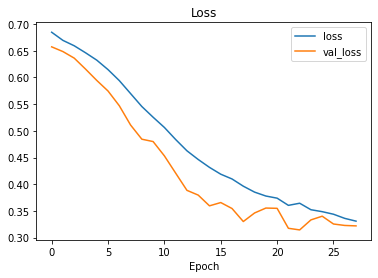

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('Epoch')

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_pred_bin = [ ( 1 if elem > 0.5 else 0) for elem in y_pred ]

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_bin))

              precision    recall  f1-score   support

           0       0.86      0.73      0.79        33
           1       0.81      0.91      0.86        43

    accuracy                           0.83        76
   macro avg       0.83      0.82      0.82        76
weighted avg       0.83      0.83      0.83        76



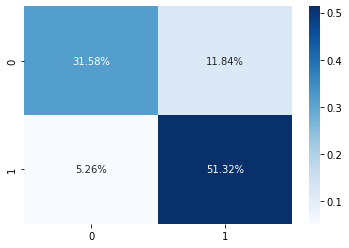

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

cf_matrix = confusion_matrix(y_test, y_pred_bin)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')